In [1]:
import pandas as pd
pd.set_option("max_rows", None)
import matplotlib.pyplot as plt
from dateutil.parser import parse
import re

In [2]:
data = pd.read_csv('~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Hall/data_hall_raw.csv') #use your path
data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['time_gap'] = data['Display Time']- data['Display Time'].shift(1)
meta = pd.read_csv('~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Hall/Hall_meta.csv')
data_description = pd.DataFrame()

In [5]:
for subjectId, df in data.groupby('subjectId'):
    subj_id = str(subjectId)
    temp = meta[meta["ID"]==subjectId]
    status = str(temp["status"].values[0])
    l_of_r = df['GlucoseValue'].count()
    maxGV = str(df['GlucoseValue'].max())
    minGV = str(df['GlucoseValue'].min())
    meanGV = round(df['GlucoseValue'].mean(),3)
    miss_val = len(df[df["time_gap"]>str("00:05:10")])
    P_miss_val = round(100*(len(df[df["time_gap"]>str("00:05:00")])/df['GlucoseValue'].count()),2)
    days = df['Display Time'].iloc[-1]-df['Display Time'].iloc[0]
    start_time = str(df['Display Time'].iloc[0])
    end_time = str(df['Display Time'].iloc[-1])
    temp_df = pd.DataFrame({'Subject ID':[subj_id], 'Status':[status], 'Length of readings':[l_of_r], 'Max. Glucose Value':[maxGV], 'Mean Glucose Value':[meanGV], 'Missing Values':[miss_val], 'Percent of missing values':[P_miss_val], 'Days':[days],'Start':[start_time],'End':[end_time]})
    data_description = pd.concat([temp_df,data_description],ignore_index=True)

display(data_description)

,Subject ID,Status,Length of readings,Max. Glucose Value,Mean Glucose Value,Missing Values,Percent of missing values,Days,Start,End
0,2133-041,non-diabetic,1858,204,108.560,17,2.91,8 days 02:09:26,2017-07-03 18:32:06,2017-07-11 20:41:32
1,2133-040,non-diabetic,1792,171,92.585,35,5.08,6 days 10:44:37,2017-06-28 13:34:52,2017-07-05 00:19:29
2,2133-039,diabetic,2013,204,103.922,130,12.12,9 days 01:34:20,2017-06-05 12:23:22,2017-06-14 13:57:42
3,2133-037,non-diabetic,1785,153,92.966,19,4.31,6 days 07:39:25,2017-06-05 14:11:14,2017-06-11 21:50:39
4,2133-036,pre-diabetic,1954,214,107.529,119,12.44,8 days 15:04:26,2017-06-01 15:26:53,2017-06-10 06:31:19
5,2133-035,pre-diabetic,1830,190,101.771,58,10.33,7 days 05:49:42,2017-06-01 17:17:00,2017-06-08 23:06:42
6,2133-033,non-diabetic,1892,161,92.981,26,4.49,7 days 07:04:31,2017-05-19 12:58:22,2017-05-26 20:02:53
7,2133-032,non-diabetic,1781,147,99.475,4,3.87,6 days 04:34:25,2017-05-19 13:31:19,2017-05-25 18:05:44
8,2133-030,non-diabetic,1818,147,93.200,7,2.53,6 days 18:44:36,2017-05-03 14:13:09,2017-05-10 08:57:45
9,2133-028,non-diabetic,1850,111,74.790,4,3.14,7 days 02:04:30,2017-05-10 00:03:32,2017-05-17 02:08:02


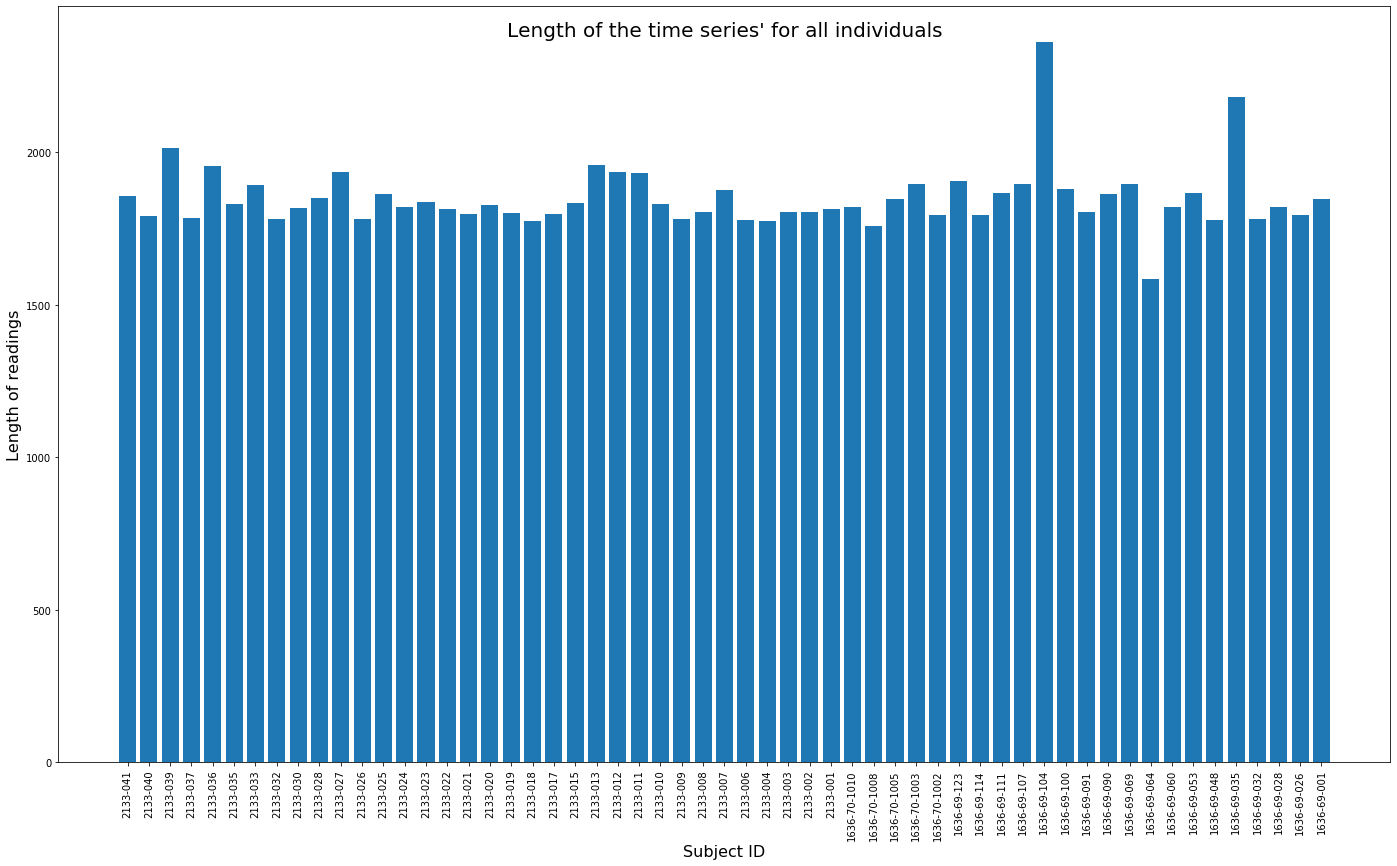

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Length of the time series\' for all individuals' , fontsize=20)
plt.xlabel('Subject ID', fontsize=16)
plt.ylabel('Length of readings', fontsize=16)
plt.xticks(rotation='vertical')
ax.bar(data_description['Subject ID'].tolist(),data_description['Length of readings'].tolist())
plt.show()

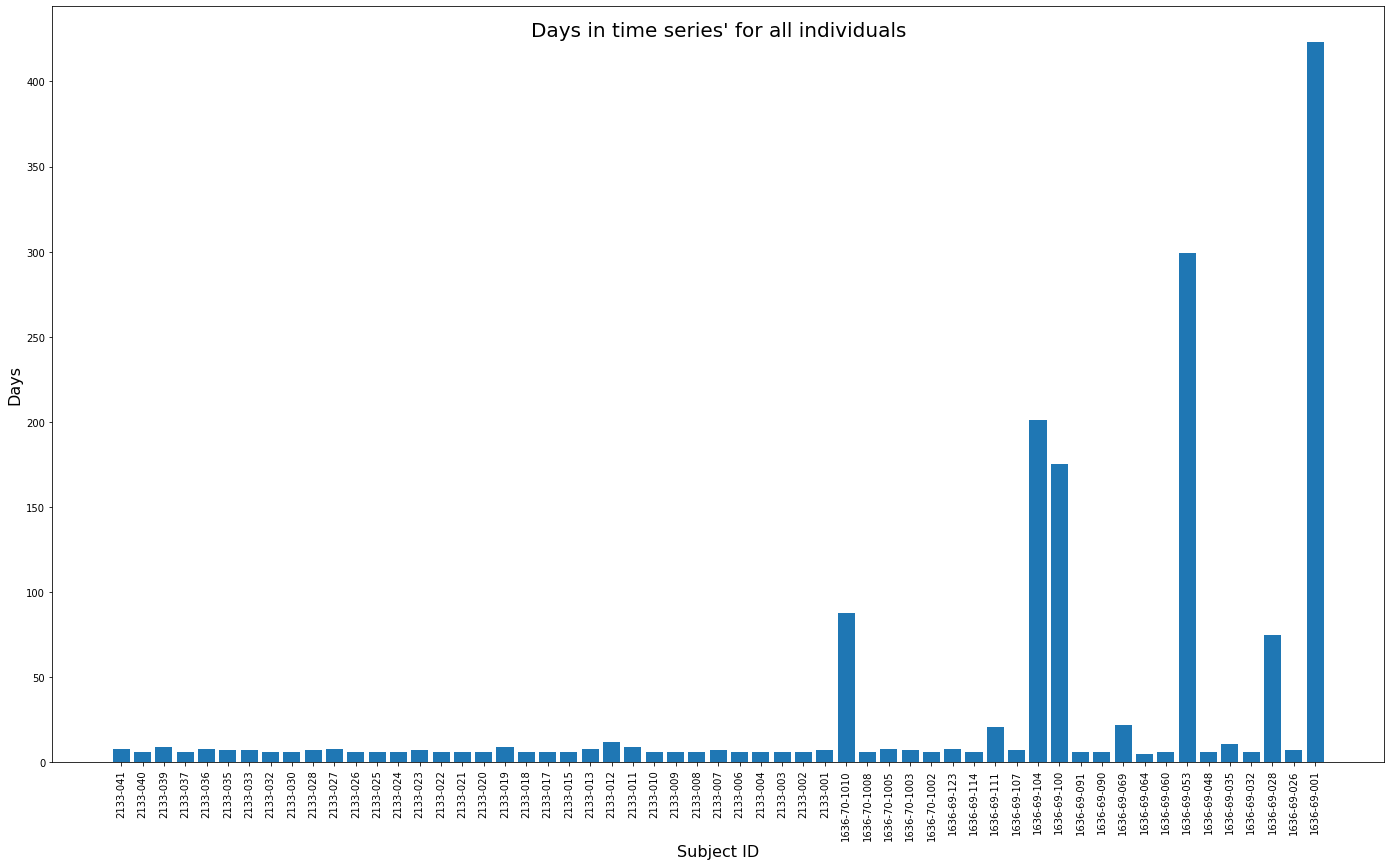

In [8]:
days = []
for i in data_description['Days']:
    days.append(i.days)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Days in time series\' for all individuals' , fontsize=20)
plt.xlabel('Subject ID', fontsize=16)
plt.ylabel('Days', fontsize=16)
plt.xticks(rotation='vertical')
ax.bar(data_description['Subject ID'].tolist(),days)
plt.show()

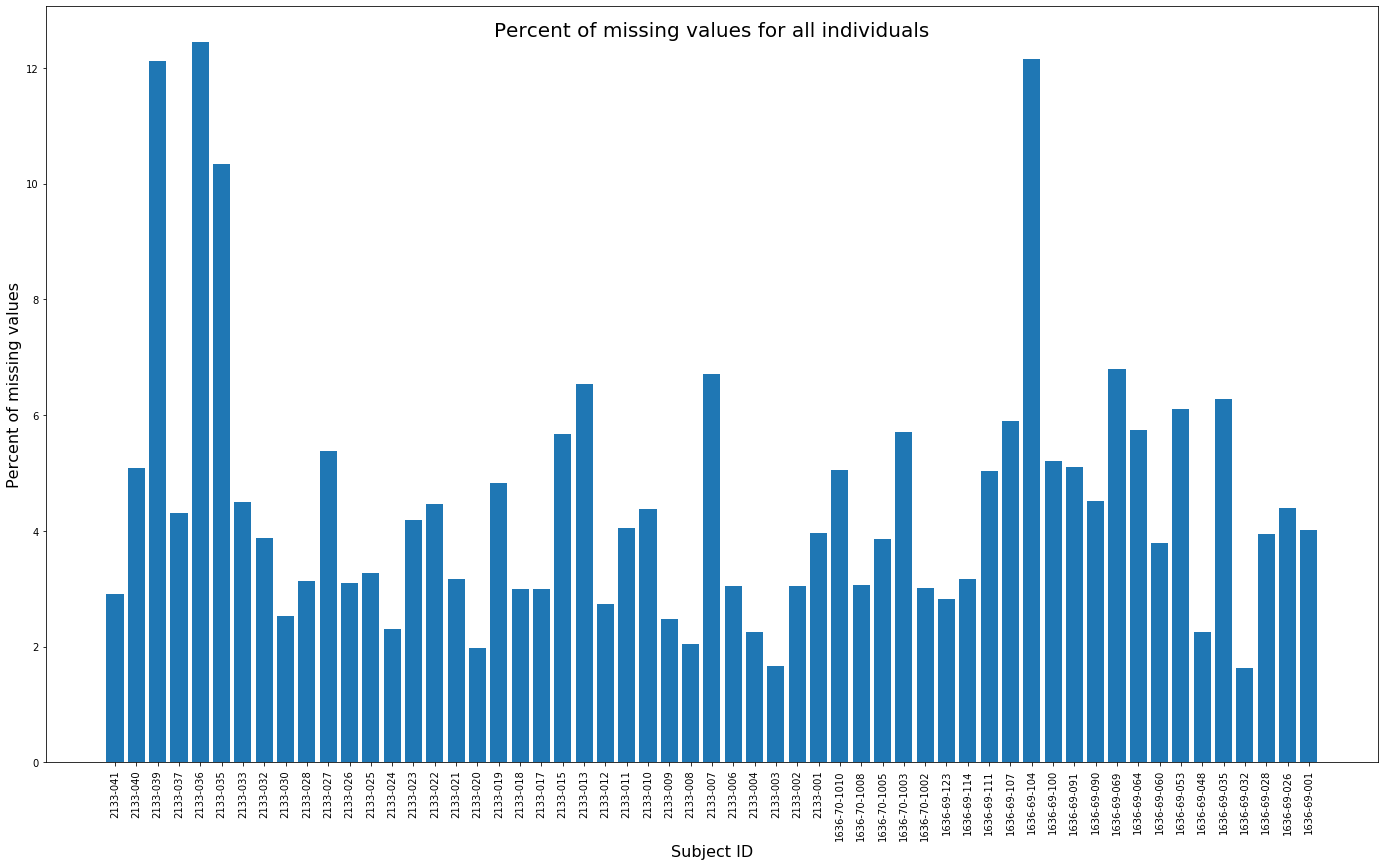

In [10]:
#data_description['Percent of missing values'] = pd.to_numeric(data_description['Percent of missing values'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Percent of missing values for all individuals' , fontsize=20)
plt.xlabel('Subject ID', fontsize=16)
plt.ylabel('Percent of missing values', fontsize=16)
plt.xticks(rotation='vertical')
ax.bar(data_description['Subject ID'].tolist(),data_description['Percent of missing values'].tolist())
plt.show()

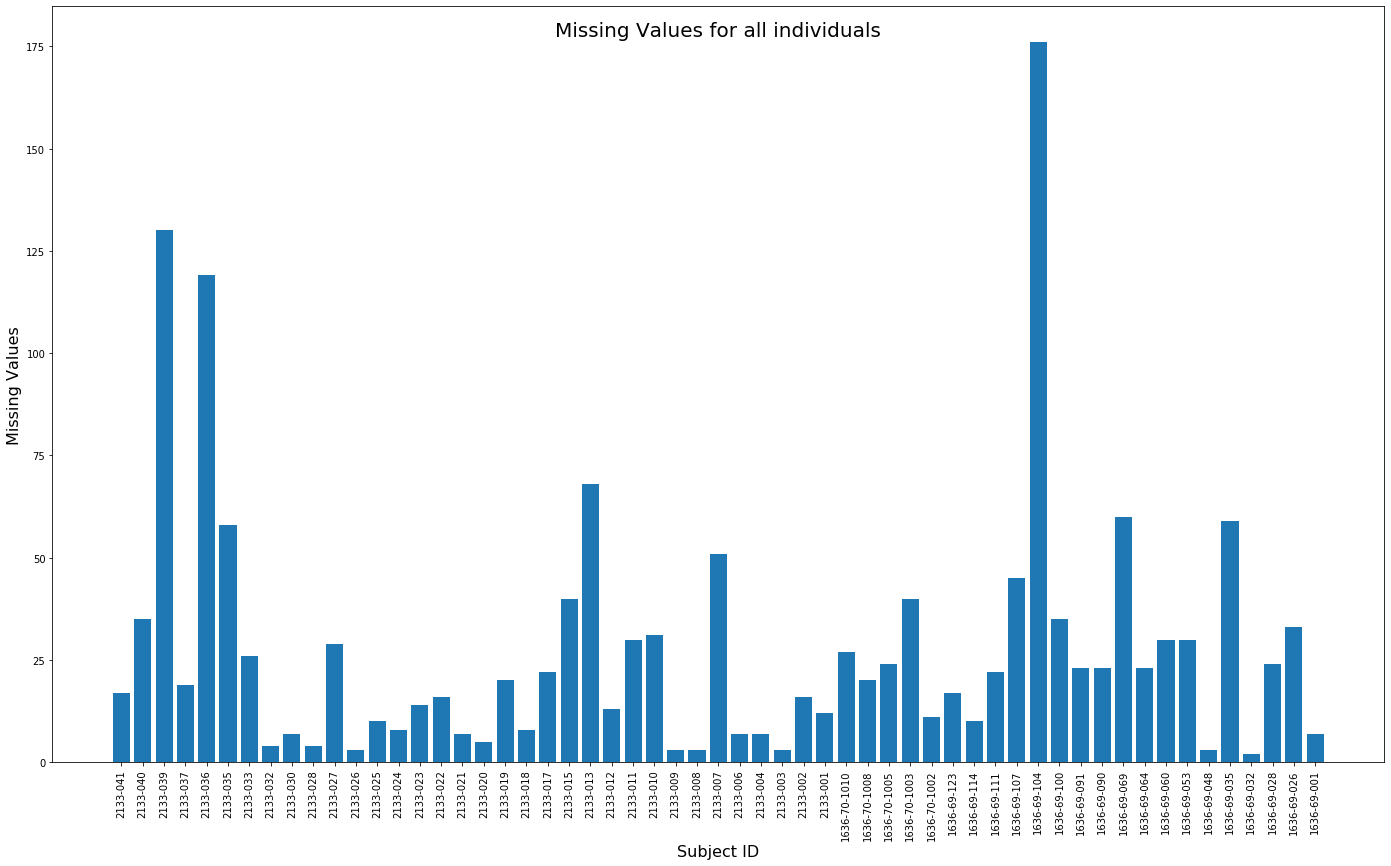

In [11]:
#data_description['Missing Values'] = pd.to_numeric(data_description['Missing Values'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Missing Values for all individuals' , fontsize=20)
plt.xlabel('Subject ID', fontsize=16)
plt.ylabel('Missing Values', fontsize=16)
plt.xticks(rotation='vertical')
ax.bar(data_description['Subject ID'].tolist(),data_description['Missing Values'].tolist())
plt.show()

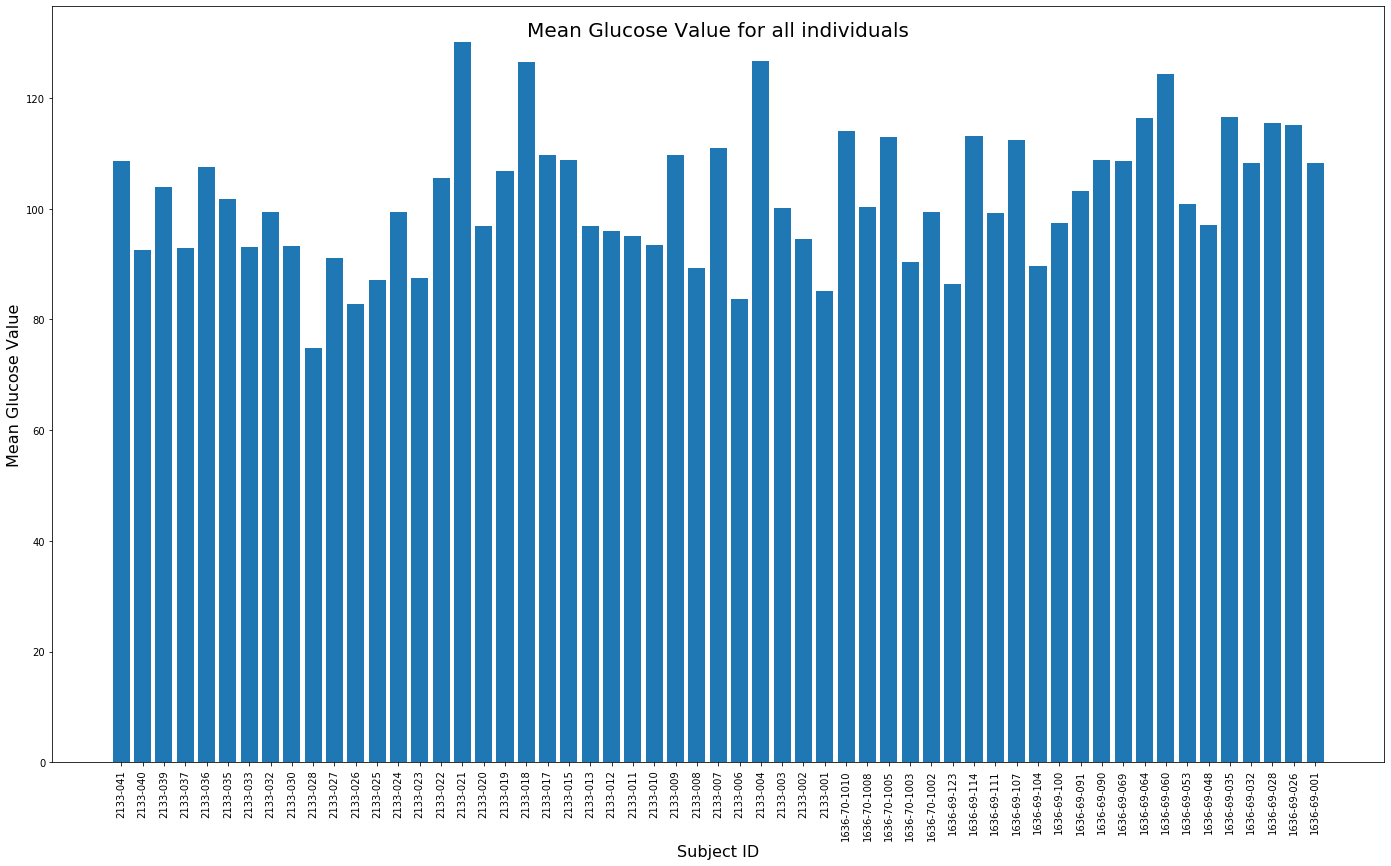

In [12]:
#data_description['Mean Glucose Value'] = pd.to_numeric(data_description['Mean Glucose Value'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Mean Glucose Value for all individuals' , fontsize=20)
plt.xlabel('Subject ID', fontsize=16)
plt.ylabel('Mean Glucose Value', fontsize=16)
plt.xticks(rotation='vertical')
ax.bar(data_description['Subject ID'].tolist(),data_description['Mean Glucose Value'].tolist())
plt.show()